# **R-Kare Yöntemi**

***R2 = SSR / SST***


**SSR = Hata kareler toplamı (modelin tahminleri ile gözlemler arasındaki farkların karelerinin toplamı)**


**SST = Toplam varyans (gözlemlerin, ortalama değerin etrafındaki farklarının karelerinin toplamı)**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv("maaslar.csv")

In [3]:
df

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [4]:
x = df.iloc[:,1:2]
y = df.iloc[:,2:]
X = x.values
Y = y.values

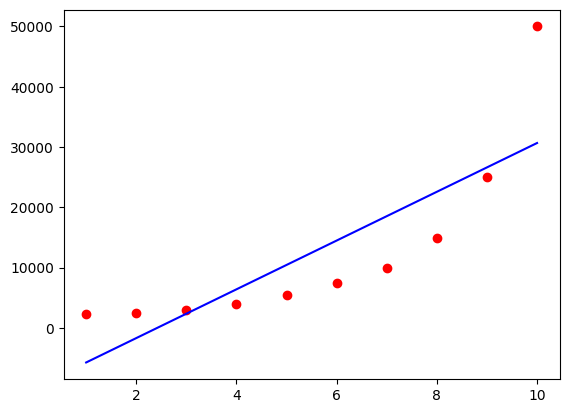

Linear R2 degeri
0.6690412331929894


In [5]:
# ** Linear regression **
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)

plt.scatter(X,Y,color='red')
plt.plot(x,lin_reg.predict(X), color = 'blue')
plt.show()

print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]]


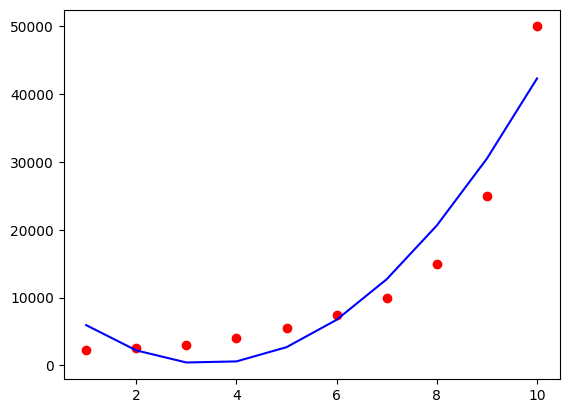

In [6]:
# ** Polynomial regression **
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
plt.scatter(X,Y,color = 'red')
plt.plot(X,lin_reg2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.show()

In [7]:
# Verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()

x_olcekli = sc1.fit_transform(X)

sc2=StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))

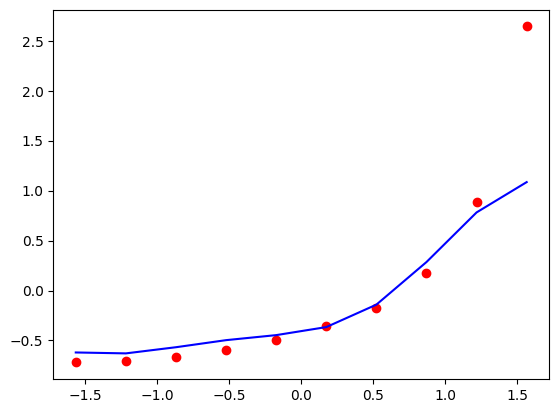

[0.01150915]
[0.01150915]
SVR R2 degeri
0.7513836788854973


In [8]:
# Support Vector Regression
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf')
svr_reg.fit(x_olcekli,y_olcekli)

plt.scatter(x_olcekli,y_olcekli,color='red')
plt.plot(x_olcekli,svr_reg.predict(x_olcekli),color='blue')

plt.show()
print(svr_reg.predict([[11]]))
print(svr_reg.predict([[6.6]]))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))

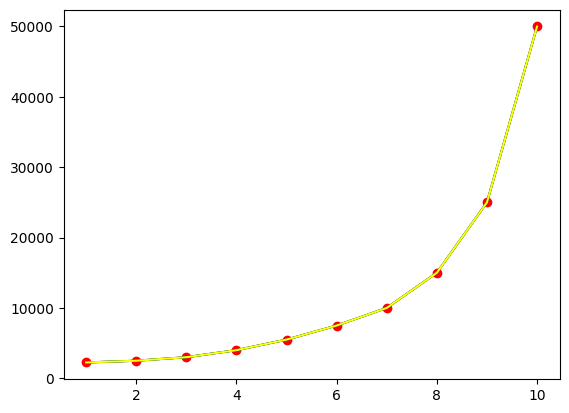

[50000.]
[10000.]
Decision Tree R2 degeri
1.0


In [9]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)
Z = X + 0.5
K = X - 0.4

plt.scatter(X,Y, color='red')
plt.plot(x,r_dt.predict(X), color='blue')
plt.plot(x,r_dt.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')
plt.show()


print(r_dt.predict([[11]]))
print(r_dt.predict([[6.6]]))

print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

[10500.]


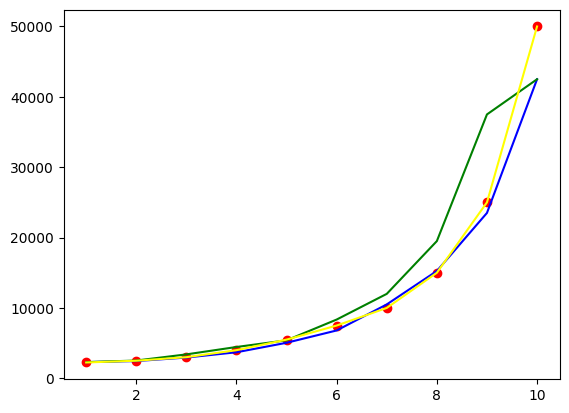

Random Forest R2 degeri
0.9704434230386582
0.9704434230386582
0.8820523231127324


In [10]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators = 10,random_state=0)
rf_reg.fit(X,Y.ravel())

print(rf_reg.predict([[6.6]]))

plt.scatter(X,Y,color='red')
plt.plot(X,rf_reg.predict(X),color='blue')

plt.plot(X,rf_reg.predict(Z),color='green')
plt.plot(x,r_dt.predict(K),color='yellow')
plt.show()


print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

print(r2_score(Y, rf_reg.predict(K)))
print(r2_score(Y, rf_reg.predict(Z)))

In [11]:
# Modellerin R2 Değerleri

print('-----------------------')
print('Linear R2 degeri')
print(r2_score(Y, lin_reg.predict(X)))

print('Polynomial R2 degeri')
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X))))

print('SVR R2 degeri')
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)))


print('Decision Tree R2 degeri')
print(r2_score(Y, r_dt.predict(X)))

print('Random Forest R2 degeri')
print(r2_score(Y, rf_reg.predict(X)))

-----------------------
Linear R2 degeri
0.6690412331929894
Polynomial R2 degeri
0.9162082221443942
SVR R2 degeri
0.7513836788854973
Decision Tree R2 degeri
1.0
Random Forest R2 degeri
0.9704434230386582
